In [48]:
import sklearn
import pickle
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import os, math, sys
import pandas as pd
import cv2

In [49]:
#cargar de un pickle

with open('/home/jupyter/Pickles/Descriptores/train.pickle', 'rb') as train:
    train_list = pickle.load(train)


with open('/home/jupyter/Pickles/Descriptores/validation.pickle', 'rb') as validation:
    validation_list = pickle.load(validation)

In [50]:
with open('/home/jupyter/Pickles/Imagenes/images_train.pickle', 'rb') as trains:
    images_train_list = pickle.load(trains)


with open('/home/jupyter/Pickles/Imagenes/images_validation.pickle', 'rb') as validations:
    images_validation_list = pickle.load(validations)

In [51]:
val_dict = pickle.load(open("/home/jupyter/Pickles/Etiquetas/diccionario_validacion", "rb"))

In [52]:
train_dict = pickle.load(open("/home/jupyter/Pickles/Etiquetas/diccionario_entrenamiento", "rb"))

In [53]:
#cerca con todas las imagenes
v_val = np.reshape(validation_list, (477,4096))
v_train = np.reshape(train_list, (1194,4096))

In [54]:
v_train = sklearn.preprocessing.normalize(train_list, norm='l2', axis=1, copy=True, return_norm=False)
v_val = sklearn.preprocessing.normalize(v_val, norm='l2', axis=1, copy=True, return_norm=False)

In [55]:
train_list_t = v_train.transpose()

In [56]:
res= np.matmul(v_val, train_list_t)

In [57]:
ranks = np.argsort(res, axis=1)[:,::-1]
x_train_img = []
x_val_img = []

In [58]:
k = 0
for k in range (477):
    x_val_img.append(np.array(images_validation_list[k]))

In [59]:
j = 0
for j in range (1194):
    x_train_img.append(np.array(images_train_list[j]))

In [60]:
h,w = (224, 224)
new_image= Image.new('RGB', (h*5,w*15))

# Visualize ranks of the 10 queries
offset = 0 # it will show results from query #'offset' to #offset+10
relevant_notrelevant = []
for q in range(len(v_val)):
        ranks_q = ranks[q*(offset+1),:]
        relevant = val_dict[q*(offset+1)].get('etiquetas')
        rel_help = [] # Cambiar variable
        for i in range(len(v_train)):
            entrenamiento = train_dict[ranks_q[i]].get('etiquetas')
            if relevant == entrenamiento and relevant != "desconegut":
                new_image.paste(ImageOps.expand(Image.fromarray(x_train_img[ranks_q[i]]), border = 10, fill = 'green'), (h*(1+i),w*q))
                rel_help.append(1)
            else:
                new_image.paste(ImageOps.expand(Image.fromarray(x_train_img[ranks_q[i]]), border = 10, fill = 'red'), (h*(1+i),w*q))
                rel_help.append(0)
        relevant_notrelevant.append(np.asarray(rel_help))    
                
        # visualize query
        ima_q = Image.fromarray(x_val_img[q*(offset+1)])
        ima_q = ImageOps.expand(ima_q, border = 10, fill='orange')
      
        new_image.paste(ima_q, (0,w*q))

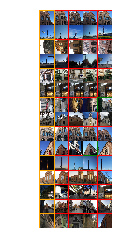

In [61]:
plt.imshow(new_image)
plt.axis('off')
plt.show()

In [62]:
new_image.save('no_funciona2.jpg')

In [20]:
castell_cartoixa = 0
farmacia_albinyana = 0
masia_freixa = 0
societat_general = 0
mnactec = 0
dona_treballadora = 0
teatre_principal = 0
escola_enginyeria = 0
estacio_nord = 0
catedral = 0
mercat_independencia = 0
ajuntament = 0
desconegut = 0

for k in range (len(train_dict)):
    variable = train_dict[k].get('etiquetas')
    if variable == "castell_cartoixa":
        castell_cartoixa = castell_cartoixa +1
    if variable == "farmacia_albinyana":
        farmacia_albinyana = farmacia_albinyana +1
    if variable == "masia_freixa":
        masia_freixa = masia_freixa +1
    if variable == "societat_general":
        societat_general = societat_general +1
    if variable == "mnactec":
        mnactec = mnactec +1
    if variable == "dona_treballadora":
        dona_treballadora = dona_treballadora +1
    if variable == "teatre_principal":
        teatre_principal = teatre_principal +1
    if variable == "escola_enginyeria":
        escola_enginyeria = escola_enginyeria +1
    if variable == "estacio_nord":
        estacio_nord = estacio_nord +1
    if variable == "catedral":
        catedral = catedral +1
    if variable == "mercat_independencia":
        mercat_independencia = mercat_independencia +1
    if variable == "ajuntament":
        ajuntament = ajuntament +1
    else:
        desconegut = desconegut +1

In [21]:
print(castell_cartoixa)

75


In [236]:
# Average precision
precisio = 0
cont = 0 # contador d'elements rellevants
ap_list = []
for k in range(len(relevant_notrelevant)):
    for j in range(1194):
        if relevant_notrelevant[k][j] == 1:
            cont = cont + 1
            precisio += float(cont)/float(k+1)
        ap = (precisio/np.sum(relevant_notrelevant))
        ap_list.append(ap)
        
plt.plot(ap_list)
plt.title('Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted =(477,1194) 
np.ones(predicted)


precision, recall, fscore, support = score(relevant,entrenamiento)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

plt.plot(precision,recall)
plt.title('Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()